In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

import datetime as dt
import math

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout, GRU, LSTM
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer

In [36]:
df1  = pd.read_excel('/content/drive/MyDrive/Tuwaiq/Week 5/Mini project - week5/Port traffic Q1 2024.xlsx')
df2  = pd.read_excel('/content/drive/MyDrive/Tuwaiq/Week 5/Mini project - week5/Port traffic Q2 2024.xlsx')


In [37]:
df = pd.concat([df1, df2])
df.shape

(69710, 6)

In [ ]:
df.sample(10)

,PORT NAME,DATE,DAY_ARB_NAME,الساعة,DIRECTION,عدد الحركات
11006,الخفجي,2024-06-08,السبت,12,قدوم,13
13934,الربع الخالي,2024-04-18,الخميس,18,مغادرة,5
34270,سلوى,2024-06-14,الجمعة,23,مغادرة,3
34272,سلوى,2024-06-15,السبت,0,مغادرة,13
33085,سلوى,2024-02-25,الاحد,10,مغادرة,24
26651,جسر الملك فهد,2024-05-04,السبت,14,قدوم,10
29563,حالة عمار,2024-04-16,الثلاثاء,19,قدوم,7
24992,جديدة عرعر,2024-06-27,الخميس,19,قدوم,17
11742,الخفجي,2024-03-26,الثلاثاء,3,مغادرة,1
14338,الربع الخالي,2024-02-06,الثلاثاء,20,قدوم,9


# Preprocessing

In [39]:
df = df.rename(columns={'عدد الحركات': 'count'})
df = df.rename(columns={'الساعة': 'hour'})


In [38]:
df['DIRECTION'].replace('قدوم', 'coming', inplace =True)
df['DIRECTION'].replace('مغادرة', 'leaving', inplace= True )

In [40]:
df['month']= df['DATE'].dt.month

In [ ]:
df.head()

,PORT NAME,DATE,DAY_ARB_NAME,hour,DIRECTION,count,month
0,البطحاء,2024-01-01,الاثنين,0,coming,3,1
1,البطحاء,2024-01-01,الاثنين,0,leaving,49,1
2,البطحاء,2024-01-01,الاثنين,1,coming,91,1
3,البطحاء,2024-01-01,الاثنين,1,leaving,56,1
4,البطحاء,2024-01-01,الاثنين,2,coming,92,1


In [7]:
# filter the data so we can build a model to predict only the number of coming
filtered_coming = df[df['DIRECTION']=='coming']

# Analysis

In [ ]:
grouped = filtered_coming.groupby('DATE')['count'].sum()


fig = px.line(grouped, x=grouped.index, y=['count'], color_discrete_sequence=['#b689fa'],  title='Incoming Vehicles Over Time')
fig.update_layout(
    xaxis_title='Time',
    yaxis_title='Incoming Traffic',
    legend_title='Legend'
)
fig.show()


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [ ]:
fig = px.box(grouped, y="count" )
fig.show()

In [41]:
# convert the unnormal data to null values
filtered_coming.loc[filtered_coming['DATE'] == '2024-04-09', 'count'] = np.nan
filtered_coming.loc[filtered_coming['DATE'] == '2024-04-10', 'count'] = np.nan
filtered_coming.loc[filtered_coming['DATE'] == '2024-04-11', 'count'] = np.nan
filtered_coming.loc[filtered_coming['DATE'] == '2024-04-12', 'count'] = np.nan
filtered_coming.loc[filtered_coming['DATE'] == '2024-04-13', 'count'] = np.nan
filtered_coming.loc[filtered_coming['DATE'] == '2024-04-14', 'count'] = np.nan

filtered_coming.loc[filtered_coming['DATE'] == '2024-06-14', 'count'] = np.nan
filtered_coming.loc[filtered_coming['DATE'] == '2024-06-15', 'count'] = np.nan
filtered_coming.loc[filtered_coming['DATE'] == '2024-06-16', 'count'] = np.nan
filtered_coming.loc[filtered_coming['DATE'] == '2024-06-17', 'count'] = np.nan
filtered_coming.loc[filtered_coming['DATE'] == '2024-06-18', 'count'] = np.nan
filtered_coming.loc[filtered_coming['DATE'] == '2024-06-19', 'count'] = np.nan

In [42]:
filtered_coming['count'] = filtered_coming['count'].bfill()


In [ ]:
grouped = filtered_coming.groupby('DATE')['count'].sum()


fig = px.line(grouped, x=grouped.index, y=['count'], color_discrete_sequence=['#b689fa'],  title='Incoming Vehicles Over Time')

fig.update_yaxes(range=[1000, 5500])
fig.update_layout(
    xaxis_title='Time',
    yaxis_title='Incoming Traffic',
    legend_title='Legend'
)
fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



## second experiment of LSTM model

In [ ]:
#***************** second experiment of LSTM model ***************************
filtered_coming = filtered_coming.dropna(subset=['count'])

In [ ]:
grouped = filtered_coming.groupby('DATE')['count'].sum()


fig = px.line(grouped, x=grouped.index, y=['count'], color_discrete_sequence=['#b689fa'],  title='Incoming Vehicles Over Time')

fig.update_yaxes(range=[1000, 5500])
fig.update_layout(
    xaxis_title='Time',
    yaxis_title='Incoming Traffic',
    legend_title='Legend'
)
fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [ ]:
new_df = filtered_coming.reset_index()[['count']]

## Scalling

In [44]:
scaler = MinMaxScaler()
# scaled_data = scaler.fit_transform(np.array(new_df).reshape(-1,1))

# Data Splitting

In [ ]:
train_size = int(len(scaled_data) * 0.8)  # 80% for training
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# Define past time steps

In [ ]:
n_past = 24

# train set
X_train, y_train = [], []
for i in range(n_past, len(train_data)):
    X_train.append(train_data[i - n_past:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


# test set
X_test, y_test = [], []
for i in range(n_past, len(test_data)):
    X_test.append(test_data[i - n_past:i, 0])
    y_test.append(test_data[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
print("Training set size:")
print(X_train.shape), print(y_train.shape)
print("Testing set size:")
print(X_test.shape), print(y_test.shape)

Training set size:
(27463, 24)
(27463,)
Testing set size:
(6848, 24)
(6848,)


(None, None)

In [ ]:
# Reshape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Building models

## RNN

In [ ]:
model_m = Sequential([
    SimpleRNN(50,return_sequences=True,input_shape=(X_train.shape[1],1)),
    Dropout(0.2),

    SimpleRNN(50,return_sequences=True),
    Dropout(0.2),

    SimpleRNN(50),
    Dense(1)
])

model_m.compile(optimizer='adam',loss='mean_absolute_error')

model_m.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 24, 50)              │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 24, 50)              │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 24, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,751 (49.81 KB)

 Trainable params: 12,751 (49.81 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
Checkpoint = ModelCheckpoint(filepath  = 'my_weights_m.h5.keras', save_best_only= True)

early_stop = EarlyStopping(monitor='val_loss', patience=15 , restore_best_weights=True)

history_1 = model_m.fit(X_train,y_train,
                        epochs=80,
                        callbacks = [Checkpoint , early_stop],
                        validation_data=(X_test,y_test),
                        batch_size=32)

Epoch 1/80
859/859 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - loss: 0.1028 - val_loss: 0.0738
Epoch 2/80
859/859 ━━━━━━━━━━━━━━━━━━━━ 34s 38ms/step - loss: 0.0623 - val_loss: 0.0665
Epoch 3/80
859/859 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - loss: 0.0623 - val_loss: 0.0454
Epoch 4/80
859/859 ━━━━━━━━━━━━━━━━━━━━ 38s 21ms/step - loss: 0.0605 - val_loss: 0.0450
Epoch 5/80
859/859 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - loss: 0.0601 - val_loss: 0.0455
Epoch 6/80
859/859 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - loss: 0.0595 - val_loss: 0.0448
Epoch 7/80
859/859 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - loss: 0.0597 - val_loss: 0.0494
Epoch 8/80
859/859 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - loss: 0.0603 - val_loss: 0.0463
Epoch 9/80
859/859 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - loss: 0.0596 - val_loss: 0.0461
Epoch 10/80
859/859 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - loss: 0.0589 - val_loss: 0.0486
Epoch 11/80
859/859 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - loss: 0.0593 - val_loss: 0.0603
Epoch 12/80
859/859 ━━━━━━━━━━

In [ ]:
predicted_values_test = model_m.predict(X_test)
predicted_values_test = scaler.inverse_transform(predicted_values_test)
testY = scaler.inverse_transform(y_test.reshape(-1, 1))

predicted_values_train = model_m.predict(X_train)
predicted_values_train = scaler.inverse_transform(predicted_values_train)
trainY = scaler.inverse_transform(y_train.reshape(-1, 1))

print(f'Test MAE: {mean_absolute_error(testY[:, 0], predicted_values_test[:, 0])}')
print(f'Train MAE: {mean_absolute_error(trainY[:, 0], predicted_values_train[:, 0])}')

n_samples = 200
testY = testY[:n_samples]
predicted_values_test = predicted_values_test[:n_samples]

min_length = min(len(testY), len(predicted_values_test))
testY = testY[:min_length]
predicted_values_test = predicted_values_test[:min_length]


data = {'Actual': testY[:, 0], 'Predicted': predicted_values_test[:, 0]}
df = pd.DataFrame(data)


fig = px.line(df, x=df.index, y=['Actual', 'Predicted'], title='Incoming Traffic Prediction (RNN)')
fig.update_layout(
    xaxis_title='Time',
    yaxis_title='Incoming Traffic',
    legend_title='Legend'
)
fig.show()

214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
859/859 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step
Test MAE: 6.7243781482853064
Train MAE: 8.3702673145737


## LSTM

In [ ]:
model_s = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

model_s.compile(optimizer='adam', loss='mean_absolute_error')

model_s.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 24, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
Checkpoint = ModelCheckpoint(filepath  = 'my_weights_s.h5.keras', save_best_only= True)

early_stop = EarlyStopping(monitor='val_loss', patience=15 , restore_best_weights=True)

history_2 = model_s.fit(X_train,y_train,
                        epochs=80,
                        callbacks = [Checkpoint , early_stop],
                        validation_data=(X_test,y_test),
                        batch_size=32)

Epoch 1/80
859/859 ━━━━━━━━━━━━━━━━━━━━ 32s 32ms/step - loss: 0.0639 - val_loss: 0.0452
Epoch 2/80
859/859 ━━━━━━━━━━━━━━━━━━━━ 40s 31ms/step - loss: 0.0587 - val_loss: 0.0450
Epoch 3/80
859/859 ━━━━━━━━━━━━━━━━━━━━ 39s 28ms/step - loss: 0.0590 - val_loss: 0.0452
Epoch 4/80
859/859 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - loss: 0.0586 - val_loss: 0.0480
Epoch 5/80
859/859 ━━━━━━━━━━━━━━━━━━━━ 39s 27ms/step - loss: 0.0582 - val_loss: 0.0449
Epoch 6/80
859/859 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - loss: 0.0578 - val_loss: 0.0449
Epoch 7/80
859/859 ━━━━━━━━━━━━━━━━━━━━ 26s 30ms/step - loss: 0.0580 - val_loss: 0.0455
Epoch 8/80
859/859 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - loss: 0.0573 - val_loss: 0.0449
Epoch 9/80
859/859 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step - loss: 0.0575 - val_loss: 0.0458
Epoch 10/80
859/859 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - loss: 0.0574 - val_loss: 0.0449
Epoch 11/80
859/859 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - loss: 0.0572 - val_loss: 0.0470
Epoch 12/80
859/859 ━━━━━━━━━━

In [ ]:
predicted_values_test = model_s.predict(X_test)
predicted_values_test = scaler.inverse_transform(predicted_values_test)
testY = scaler.inverse_transform(y_test.reshape(-1, 1))

predicted_values_train = model_s.predict(X_train)
predicted_values_train = scaler.inverse_transform(predicted_values_train)
trainY = scaler.inverse_transform(y_train.reshape(-1, 1))

print(f'Test MAE: {mean_absolute_error(testY[:, 0], predicted_values_test[:, 0])}')
print(f'Train MAE: {mean_absolute_error(trainY[:, 0], predicted_values_train[:, 0])}')

n_samples = 200
testY = testY[:n_samples]
predicted_values_test = predicted_values_test[:n_samples]

min_length = min(len(testY), len(predicted_values_test))
testY = testY[:min_length]
predicted_values_test = predicted_values_test[:min_length]


data = {'Actual': testY[:, 0], 'Predicted': predicted_values_test[:, 0]}
df = pd.DataFrame(data)


fig = px.line(df, x=df.index, y=['Actual', 'Predicted'], title='Incoming Traffic Prediction (LSTM)')
fig.update_layout(
    xaxis_title='Time',
    yaxis_title='Incoming Traffic',
    legend_title='Legend'
)
fig.show()

214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
859/859 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step
Test MAE: 6.655724403439699
Train MAE: 7.887439698615305


## GRU

In [ ]:
model_h = Sequential([
    GRU(units=32, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    GRU(units=32, return_sequences=False),
    Dense(units=16),
    Dense(units=1)
])


model_h.compile(optimizer='adam', loss='mean_absolute_error')

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

history = model_h.fit(X_train, y_train, epochs=40, batch_size=16, validation_data=(X_test, y_test), callbacks= [early_stopping])

Epoch 1/40
1717/1717 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - loss: 0.0633 - val_loss: 0.0449
Epoch 2/40
1717/1717 ━━━━━━━━━━━━━━━━━━━━ 85s 27ms/step - loss: 0.0591 - val_loss: 0.0447
Epoch 3/40
1717/1717 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - loss: 0.0595 - val_loss: 0.0448
Epoch 4/40
1717/1717 ━━━━━━━━━━━━━━━━━━━━ 48s 28ms/step - loss: 0.0582 - val_loss: 0.0447
Epoch 5/40
1717/1717 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - loss: 0.0577 - val_loss: 0.0449
Epoch 6/40
1717/1717 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - loss: 0.0573 - val_loss: 0.0453
Epoch 7/40
1717/1717 ━━━━━━━━━━━━━━━━━━━━ 83s 27ms/step - loss: 0.0575 - val_loss: 0.0470
Epoch 8/40
1717/1717 ━━━━━━━━━━━━━━━━━━━━ 47s 27ms/step - loss: 0.0570 - val_loss: 0.0453
Epoch 9/40
1717/1717 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - loss: 0.0569 - val_loss: 0.0456
Epoch 10/40
1717/1717 ━━━━━━━━━━━━━━━━━━━━ 47s 28ms/step - loss: 0.0565 - val_loss: 0.0460
Epoch 11/40
1717/1717 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - loss: 0.0565 - val_loss: 0.0450
Epoch 12

### Predection - Evaluation

In [ ]:
predicted_values_test = model_h.predict(X_test)
predicted_values_test = scaler.inverse_transform(predicted_values_test)
testY = scaler.inverse_transform(y_test.reshape(-1, 1))

predicted_values_train = model_h.predict(X_train)
predicted_values_train = scaler.inverse_transform(predicted_values_train)
trainY = scaler.inverse_transform(y_train.reshape(-1, 1))

print(f'Test MAE: {mean_absolute_error(testY[:, 0], predicted_values_test[:, 0])}')
print(f'Train MAE: {mean_absolute_error(trainY[:, 0], predicted_values_train[:, 0])}')

n_samples = 200
testY = testY[:n_samples]
predicted_values_test = predicted_values_test[:n_samples]

min_length = min(len(testY), len(predicted_values_test))
testY = testY[:min_length]
predicted_values_test = predicted_values_test[:min_length]


data = {'Actual': testY[:, 0], 'Predicted': predicted_values_test[:, 0]}
df = pd.DataFrame(data)


fig = px.line(df, x=df.index, y=['Actual', 'Predicted'], title='Incoming Traffic Prediction')
fig.update_layout(
    xaxis_title='Time',
    yaxis_title='Incoming Traffic',
    legend_title='Legend'
)
fig.show()

214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
859/859 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step
Test MAE: 6.585015934761439
Train MAE: 7.870607278947272


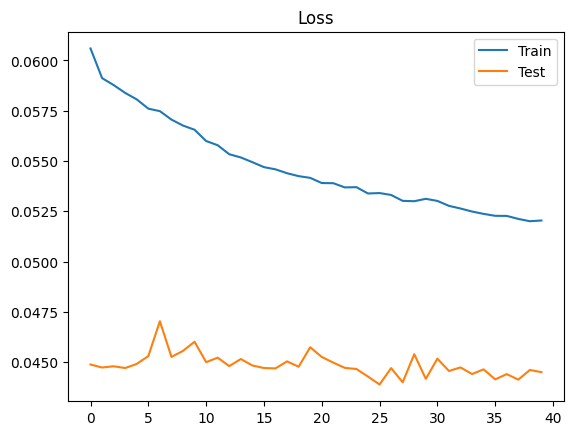

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.legend()
plt.show()

## LSTM
**In this experiment we tried to drop the data that had a gap (Eid al-Fitr, Eid al-Adha)**

In [ ]:
model_a = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model_a.compile(optimizer='adam', loss='mean_absolute_error')

model_a.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 24, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 24, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
Checkpoint = ModelCheckpoint(filepath  = 'my_weights_a.h5.keras', save_best_only= True)

early_stop = EarlyStopping(monitor='val_loss', patience=15 , restore_best_weights=True)

history_3 = model_a.fit(X_train,y_train,
                        epochs=80,
                        callbacks = [Checkpoint , early_stop],
                        validation_data=(X_test,y_test),
                        batch_size=32)

Epoch 1/80
812/812 ━━━━━━━━━━━━━━━━━━━━ 28s 31ms/step - loss: 0.0679 - val_loss: 0.0483
Epoch 2/80
812/812 ━━━━━━━━━━━━━━━━━━━━ 32s 39ms/step - loss: 0.0629 - val_loss: 0.0489
Epoch 3/80
812/812 ━━━━━━━━━━━━━━━━━━━━ 27s 33ms/step - loss: 0.0614 - val_loss: 0.0481
Epoch 4/80
812/812 ━━━━━━━━━━━━━━━━━━━━ 39s 30ms/step - loss: 0.0621 - val_loss: 0.0492
Epoch 5/80
812/812 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - loss: 0.0614 - val_loss: 0.0480
Epoch 6/80
812/812 ━━━━━━━━━━━━━━━━━━━━ 42s 32ms/step - loss: 0.0613 - val_loss: 0.0485
Epoch 7/80
812/812 ━━━━━━━━━━━━━━━━━━━━ 38s 29ms/step - loss: 0.0605 - val_loss: 0.0484
Epoch 8/80
812/812 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - loss: 0.0609 - val_loss: 0.0484
Epoch 9/80
812/812 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step - loss: 0.0610 - val_loss: 0.0483
Epoch 10/80
812/812 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - loss: 0.0606 - val_loss: 0.0486
Epoch 11/80
812/812 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - loss: 0.0603 - val_loss: 0.0486
Epoch 12/80
812/812 ━━━━━━━━━━

In [ ]:
predicted_values_test = model_a.predict(X_test)
predicted_values_test = scaler.inverse_transform(predicted_values_test)
testY = scaler.inverse_transform(y_test.reshape(-1, 1))

predicted_values_train = model_a.predict(X_train)
predicted_values_train = scaler.inverse_transform(predicted_values_train)
trainY = scaler.inverse_transform(y_train.reshape(-1, 1))

print(f'Test MAE: {mean_absolute_error(testY[:, 0], predicted_values_test[:, 0])}')
print(f'Train MAE: {mean_absolute_error(trainY[:, 0], predicted_values_train[:, 0])}')

n_samples = 200
testY = testY[:n_samples]
predicted_values_test = predicted_values_test[:n_samples]

min_length = min(len(testY), len(predicted_values_test))
testY = testY[:min_length]
predicted_values_test = predicted_values_test[:min_length]


data = {'Actual': testY[:, 0], 'Predicted': predicted_values_test[:, 0]}
df = pd.DataFrame(data)


fig = px.line(df, x=df.index, y=['Actual', 'Predicted'], title='Incoming Traffic Prediction (LSTM 2)')
fig.update_layout(
    xaxis_title='Time',
    yaxis_title='Incoming Traffic',
    legend_title='Legend'
)
fig.show()

203/203 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
812/812 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step
Test MAE: 7.204832909281086
Train MAE: 8.920022319140163


## LSTM model with multi features

In [57]:
filtered_coming.head()

,PORT NAME,DATE,DAY_ARB_NAME,hour,DIRECTION,count,month
0,البطحاء,2024-01-01,الاثنين,0,coming,3.0,1
2,البطحاء,2024-01-01,الاثنين,1,coming,91.0,1
4,البطحاء,2024-01-01,الاثنين,2,coming,92.0,1
6,البطحاء,2024-01-01,الاثنين,3,coming,61.0,1
8,البطحاء,2024-01-01,الاثنين,4,coming,92.0,1


In [58]:
new_df = df[['DATE', 'count', 'DAY_ARB_NAME']]
new_df.set_index('DATE', inplace=True)
new_df.head()

,count,DAY_ARB_NAME
DATE,,
2024-01-01,3,الاثنين
2024-01-01,49,الاثنين
2024-01-01,91,الاثنين
2024-01-01,56,الاثنين
2024-01-01,92,الاثنين


In [59]:
new_df['DAY_ARB_NAME']= new_df['DAY_ARB_NAME'].map({'السبت': 'Saturday', 'الاحد': 'Sunday', 'الاثنين': 'Monday', 'الثلاثاء': 'Tuesday', 'الاربعاء': 'Wednesday', 'الخميس': 'Thursday', 'الجمعة': 'Friday'})

<ipython-input-59-23038bc35930>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['DAY_ARB_NAME']= new_df['DAY_ARB_NAME'].map({'السبت': 'Saturday', 'الاحد': 'Sunday', 'الاثنين': 'Monday', 'الثلاثاء': 'Tuesday', 'الاربعاء': 'Wednesday', 'الخميس': 'Thursday', 'الجمعة': 'Friday'})


In [60]:
train_split = round(len(new_df) * 0.8)
train_data = new_df.iloc[:train_split]
test_data = new_df.iloc[train_split:]

In [62]:
encoder = OrdinalEncoder()

train_data['DAY_ARB_NAME'] = encoder.fit_transform(train_data[['DAY_ARB_NAME']])
test_data['DAY_ARB_NAME'] = encoder.transform(test_data[['DAY_ARB_NAME']])

<ipython-input-62-ea6d34f9acc0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['DAY_ARB_NAME'] = encoder.fit_transform(train_data[['DAY_ARB_NAME']])
<ipython-input-62-ea6d34f9acc0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['DAY_ARB_NAME'] = encoder.transform(test_data[['DAY_ARB_NAME']])


In [63]:
scaler = MinMaxScaler()
train_data['count'] = scaler.fit_transform(train_data['count'].values.reshape(-1, 1))
test_data['count'] = scaler.transform(test_data['count'].values.reshape(-1, 1))

<ipython-input-63-ce584fe0de0a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['count'] = scaler.fit_transform(train_data['count'].values.reshape(-1, 1))
<ipython-input-63-ce584fe0de0a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['count'] = scaler.transform(test_data['count'].values.reshape(-1, 1))


In [66]:
def create_dataset(dataset, time_step):
    X, Y = [], []

    # Convert the DataFrame to a NumPy array
    dataset_array = dataset.values

    for i in range(len(dataset_array) - time_step - 1):
        a = dataset_array[i:(i + time_step), :]
        X.append(a)
        Y.append(dataset_array[i + time_step, 0])
    return np.array(X), np.array(Y)

X_train, y_train = create_dataset(train_data, 24)
X_test, y_test = create_dataset(test_data, 24)

print("Training set size:")
print(X_train.shape), print(y_train.shape)
print("Testing set size:")
print(X_test.shape), print(y_test.shape)


Training set size:
(55743, 24, 2)
(55743,)
Testing set size:
(13917, 24, 2)
(13917,)


(None, None)

In [67]:
model_lstm = Sequential([
    LSTM(30, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(30, return_sequences=False),

    Dense(1)
])



model_lstm.compile(optimizer='adam', loss='mean_absolute_error')
model_lstm.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 24, 30)              │           3,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 30)                  │           7,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,311 (44.18 KB)

 Trainable params: 11,311 (44.18 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
Checkpoint = ModelCheckpoint(filepath  = 'my_weights.h5.keras', save_best_only= True)

early_stop = EarlyStopping(monitor='val_loss', patience=10 , restore_best_weights=True)

history_4 = model_lstm.fit(X_train,y_train,
                        epochs=80,
                        callbacks = [Checkpoint , early_stop],
                        validation_data=(X_test,y_test),
                        batch_size=32)

Epoch 1/80
1742/1742 ━━━━━━━━━━━━━━━━━━━━ 49s 25ms/step - loss: 0.0520 - val_loss: 0.0300
Epoch 2/80
1742/1742 ━━━━━━━━━━━━━━━━━━━━ 84s 26ms/step - loss: 0.0437 - val_loss: 0.0300
Epoch 3/80
1742/1742 ━━━━━━━━━━━━━━━━━━━━ 80s 25ms/step - loss: 0.0426 - val_loss: 0.0307
Epoch 4/80
1742/1742 ━━━━━━━━━━━━━━━━━━━━ 82s 25ms/step - loss: 0.0428 - val_loss: 0.0291
Epoch 5/80
1742/1742 ━━━━━━━━━━━━━━━━━━━━ 82s 25ms/step - loss: 0.0419 - val_loss: 0.0292
Epoch 6/80
1742/1742 ━━━━━━━━━━━━━━━━━━━━ 81s 25ms/step - loss: 0.0411 - val_loss: 0.0297
Epoch 7/80
1742/1742 ━━━━━━━━━━━━━━━━━━━━ 81s 24ms/step - loss: 0.0414 - val_loss: 0.0301
Epoch 8/80
1742/1742 ━━━━━━━━━━━━━━━━━━━━ 82s 25ms/step - loss: 0.0410 - val_loss: 0.0294
Epoch 9/80
1742/1742 ━━━━━━━━━━━━━━━━━━━━ 82s 24ms/step - loss: 0.0405 - val_loss: 0.0291
Epoch 10/80
1742/1742 ━━━━━━━━━━━━━━━━━━━━ 82s 24ms/step - loss: 0.0406 - val_loss: 0.0290
Epoch 11/80
1742/1742 ━━━━━━━━━━━━━━━━━━━━ 83s 25ms/step - loss: 0.0409 - val_loss: 0.0288
Epoch 12

In [70]:
predicted_values_test = model_lstm.predict(X_test)
predicted_values_test = scaler.inverse_transform(predicted_values_test)

testY = scaler.inverse_transform(y_test.reshape(-1, 1))

predicted_values_train = model_lstm.predict(X_train)
predicted_values_train = scaler.inverse_transform(predicted_values_train)
trainY = scaler.inverse_transform(y_train.reshape(-1, 1))

print(f'Test MAE: {mean_absolute_error(testY, predicted_values_test)}')
print(f'Train MAE: {mean_absolute_error(trainY, predicted_values_train)}')

n_samples = 200
testY = testY[:n_samples]
predicted_values_test = predicted_values_test[:n_samples]

min_length = min(len(testY), len(predicted_values_test))
testY = testY[:min_length]
predicted_values_test = predicted_values_test[:min_length]

data = {'Actual': testY.flatten(), 'Predicted': predicted_values_test.flatten()}
df = pd.DataFrame(data)


fig = px.line(df, x=df.index, y=['Actual', 'Predicted'], title='Incoming Traffic Prediction (LSTM)')
fig.update_layout(
    xaxis_title='Time',
    yaxis_title='Incoming Traffic',
    legend_title='Legend'
)
fig.show()


435/435 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
1742/1742 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step
Test MAE: 6.4717669277053425
Train MAE: 8.90220355315616
